# Loading libraries
Loading the libraries I will need and suppressing the warnings, as per advice from classes.

In [136]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes=True) 
import sklearn.preprocessing as preproc
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy import stats
import statistics as stats
from scipy.stats import poisson
from scipy.stats import binom
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
import math

import warnings
warnings.filterwarnings('ignore')

### I will set columns containing floating point number to display only 2 decimal places after decimal point

In [69]:
pd.options.display.float_format = '{:.2f}'.format

## Importing the dataset

In [70]:
df = pd.read_csv('aps_failure_set.csv')
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


## Exploring the dataset I have:
To check if positive class is showing up, to get general info about the data - what kind of data type are used in columns, to check which column is int64 column etc.

In [71]:
df.tail(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59990,neg,81354,na,2130706432,156,0,0,0,0,0,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,neg,39308,na,452,374,0,0,0,0,0,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,neg,14,0,2,2,0,0,0,0,0,...,132,44,80,52,54,0,0,0,0,0
59993,neg,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59994,neg,32,0,0,na,0,0,0,0,0,...,258,98,224,166,36,486,0,0,0,0
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [73]:
df.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

### Checking which column is int64 column

In [74]:
int_columns = df.select_dtypes(include=['int64']).columns.tolist()

print(int_columns)

['aa_000']


# 

# Removing null values

### Checking if there are null values

In [75]:
print (df.isnull().sum())

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64


In [76]:
null_count = df.isnull().sum().sum()
print(null_count)

0


### Checking if there is any column that contains only "0" values, so I can drop it

In [77]:
constant_cols = [col for col in df.columns if df[col].nunique() == 0]

print(constant_cols)

[]


### Getting number of na values and removing them
From the data I observed, there is only "na" value to be removed from whole dataset, but I will include couple of them more, just in case as dataset is big. I will count the occurrences of each search string in the entire DataFrame.

In [78]:
df = pd.read_csv('aps_failure_set.csv')
search_strings = ['na', 'NA', 'N/A', 'n/a', 'null', 'NULL','--']

count_dict = {}
for search_string in search_strings:
    count_dict[search_string] = (df == search_string).sum().sum()

for search_string, count in count_dict.items():
    print(f"{search_string}: {count}")

na: 850015
NA: 0
N/A: 0
n/a: 0
null: 0
NULL: 0
--: 0


### Checking if there are any "na" values in class column

In [79]:
df = pd.read_csv('aps_failure_set.csv')

class_count = df['class'].value_counts()

print(class_count)

neg    59000
pos     1000
Name: class, dtype: int64


### Plotting number of negatives and positives

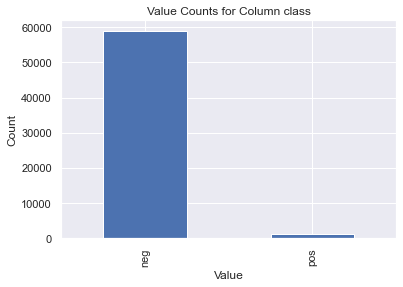

In [80]:
counts = df['class'].value_counts()

counts.plot(kind='bar')

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Value Counts for Column class')

plt.show()

<AxesSubplot:xlabel='class'>

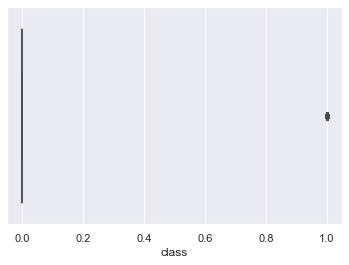

In [93]:
sns.boxplot(x=df['class'])

# Replacing "na" values with NaN values
Applying make_int function to the entire dataframe except 'class' column using applymap, as by previous check, class column has no "na" values and don't want to change all the values with NaN. 

In [82]:
missing_value_format = ['na']
df = pd.read_csv('aps_failure_set.csv', na_values = missing_value_format)
def make_int(i):
    try:
        return int(i)
    except:
        return pd.np.nan

df.loc[:, df.columns != 'class'] = df.loc[:, df.columns != 'class'].applymap(make_int)
df.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438.00,280.00,0.00,0.00,0.00,0.00,0.00,...,1240520.00,493384.00,721044.00,469792.00,339156.00,157956.00,73224.00,0.00,0.00,0.00
1,neg,33058,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,...,421400.00,178064.00,293306.00,245416.00,133654.00,81140.00,97576.00,1500.00,0.00,0.00
2,neg,41040,NaN,228.00,100.00,0.00,0.00,0.00,0.00,0.00,...,277378.00,159812.00,423992.00,409564.00,320746.00,158022.00,95128.00,514.00,0.00,0.00
3,neg,12,0.00,70.00,66.00,0.00,10.00,0.00,0.00,0.00,...,240.00,46.00,58.00,44.00,10.00,0.00,0.00,0.00,4.00,32.00
4,neg,60874,NaN,1368.00,458.00,0.00,0.00,0.00,0.00,0.00,...,622012.00,229790.00,405298.00,347188.00,286954.00,311560.00,433954.00,1218.00,0.00,0.00


### In order to avoid exception of the "class" column all the time and issues with having object cells, I will replace "neg" and "pos" values with "0" and "1" respectively. 

In [83]:
df['class'] = df['class'].replace(['neg', 'pos'], [0, 1])

In [84]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438.00,280.00,0.00,0.00,0.00,0.00,0.00,...,1240520.00,493384.00,721044.00,469792.00,339156.00,157956.00,73224.00,0.00,0.00,0.00
1,0,33058,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,...,421400.00,178064.00,293306.00,245416.00,133654.00,81140.00,97576.00,1500.00,0.00,0.00
2,0,41040,NaN,228.00,100.00,0.00,0.00,0.00,0.00,0.00,...,277378.00,159812.00,423992.00,409564.00,320746.00,158022.00,95128.00,514.00,0.00,0.00
3,0,12,0.00,70.00,66.00,0.00,10.00,0.00,0.00,0.00,...,240.00,46.00,58.00,44.00,10.00,0.00,0.00,0.00,4.00,32.00
4,0,60874,NaN,1368.00,458.00,0.00,0.00,0.00,0.00,0.00,...,622012.00,229790.00,405298.00,347188.00,286954.00,311560.00,433954.00,1218.00,0.00,0.00


### Distribution of NaN values
I will use the heatmap to identify columns with highest number of missing values. Yellow color marks missing values.

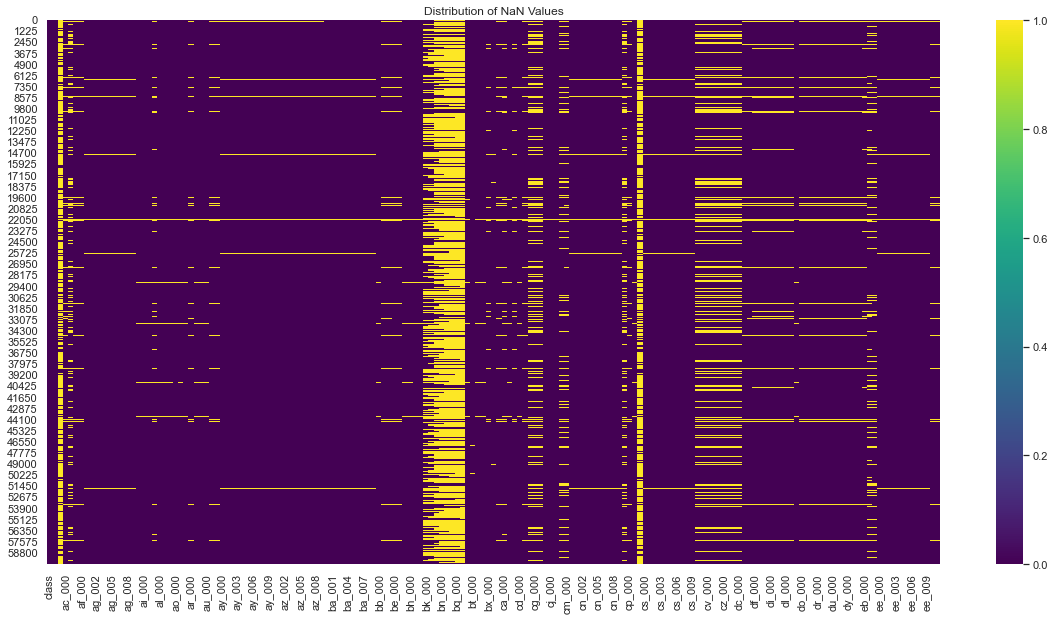

In [85]:
missing_values = df.isnull().sum()

plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Distribution of NaN Values')
plt.show()

### Plotting a bar chart of top 10 columns containing NaN values
In order to get this chart, code will calculate percentage of NaN values in each column using "isna()" and "sum()" methods. Then it will sort the columns in by their NaN percentages and select top 10 ones with the highest percentage of NaN values.
At the end, it will plot a bar chart of the top 10 columns using "bar()" method of matplotlib. 

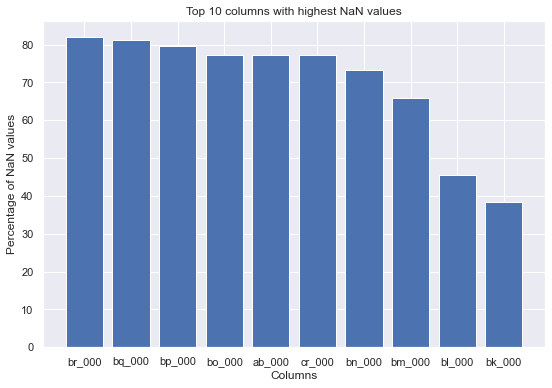

In [86]:
na_percentages = df.isna().sum() / len(df) * 100

na_percentages_sorted = na_percentages.sort_values(ascending=False)

top_10_na_features = na_percentages_sorted.head(10)

plt.figure(figsize=(9,6))
plt.bar(top_10_na_features.index, top_10_na_features.values)
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN values')
plt.title('Top 10 columns with highest NaN values')
plt.show()

### Removing all the columns with more than 70% of NaN values in it.
In first attempt, I was removing all the NaN values, but that reduced my dataset drastically and would affect results, therefore, I'm applying this method instead. First, I will calculate the threshold for dropping columns. Then, I will drop columns with more than 70% NaN values.
Number of columns reduced from 171 to 161. Other NaN values will be filled in by using mean.

In [87]:
threshold = len(df) * 0.7

df = df.dropna(thresh=threshold, axis=1)

print(df.head())

   class  aa_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  \
0      0   76698 2130706438.00  280.00    0.00    0.00    0.00    0.00   
1      0   33058          0.00     NaN    0.00    0.00    0.00    0.00   
2      0   41040        228.00  100.00    0.00    0.00    0.00    0.00   
3      0      12         70.00   66.00    0.00   10.00    0.00    0.00   
4      0   60874       1368.00  458.00    0.00    0.00    0.00    0.00   

   ag_002  ag_003  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0    0.00    0.00  ... 1240520.00 493384.00 721044.00 469792.00 339156.00   
1    0.00    0.00  ...  421400.00 178064.00 293306.00 245416.00 133654.00   
2    0.00    0.00  ...  277378.00 159812.00 423992.00 409564.00 320746.00   
3    0.00  318.00  ...     240.00     46.00     58.00     44.00     10.00   
4    0.00    0.00  ...  622012.00 229790.00 405298.00 347188.00 286954.00   

     ee_007    ee_008  ee_009  ef_000  eg_000  
0 157956.00  73224.00    0.00    0.00    0.0

In [88]:
num_rows, num_cols = df.shape

print("Number of rows: {}".format(num_rows))
print("Number of columns: {}".format(num_cols))

Number of rows: 60000
Number of columns: 161


### Replacing the rest of the NaN values with the mean of the column

In [89]:
df.fillna(df.mean(), inplace=True)
df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438.00,280.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1240520.00,493384.00,721044.00,469792.00,339156.00,157956.00,73224.00,0.00,0.00,0.00
1,0,33058,0.00,190620.64,0.00,0.00,0.00,0.00,0.00,0.00,...,421400.00,178064.00,293306.00,245416.00,133654.00,81140.00,97576.00,1500.00,0.00,0.00
2,0,41040,228.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,...,277378.00,159812.00,423992.00,409564.00,320746.00,158022.00,95128.00,514.00,0.00,0.00
3,0,12,70.00,66.00,0.00,10.00,0.00,0.00,0.00,318.00,...,240.00,46.00,58.00,44.00,10.00,0.00,0.00,0.00,4.00,32.00
4,0,60874,1368.00,458.00,0.00,0.00,0.00,0.00,0.00,0.00,...,622012.00,229790.00,405298.00,347188.00,286954.00,311560.00,433954.00,1218.00,0.00,0.00


### To check if all the NaN values are removed:

In [90]:
nan_counts = df.isna().sum().sum()

print(nan_counts)

0


### I will use again previously used heatmap and bar chart to show data is clean now and there are no NaN values

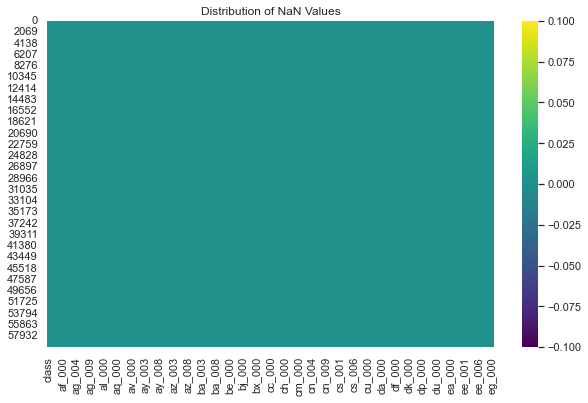

In [91]:
missing_values = df.isnull().sum()

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Distribution of NaN Values')
plt.show()

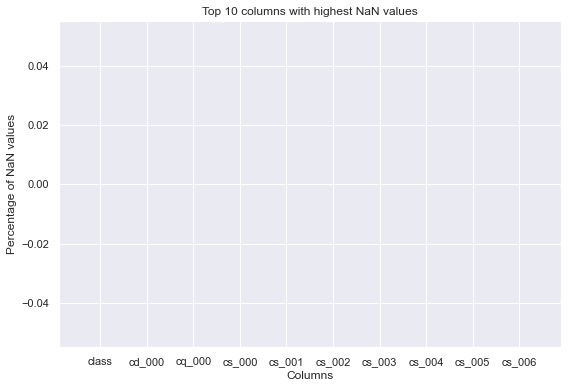

In [92]:
na_percentages = df.isna().sum() / len(df) * 100

na_percentages_sorted = na_percentages.sort_values(ascending=False)

top_10_na_features = na_percentages_sorted.head(10)

plt.figure(figsize=(9,6))
plt.bar(top_10_na_features.index, top_10_na_features.values)
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN values')
plt.title('Top 10 columns with highest NaN values')
plt.show()

# PCA
Before starting with PCA, I will normalize the data by applying minmax scalling on whole dataset.

In [94]:
scaled_df = pd.DataFrame()

for col in df.columns:
    scaled_df[col] = preprocessing.minmax_scale(df[col])

scaled_df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.00,0.03,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00
1,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
2,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03
4,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.01,0.00,0.01,0.01,0.00,0.02,0.00,0.00,0.00


In [95]:
ScaniaNoLabel = scaled_df.drop(columns='class')
ScaniaNoLabel

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.03,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00
1,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
2,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03
4,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.01,0.00,0.01,0.01,0.00,0.02,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.02,0.01,0.02,0.03,0.01,0.05,0.01,0.00,0.00
59996,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
59997,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
59998,0.03,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.01,0.00,0.00,0.01,0.00,0.04,0.10,0.00,0.00


Text(0, 0.5, 'cumulative explained variance')

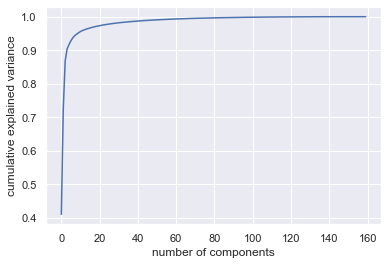

In [96]:
pca = PCA().fit(ScaniaNoLabel)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### As number of components is too high, I will reduce it to 10 components, to get more clear image:

Text(0, 0.5, 'cumulative explained variance')

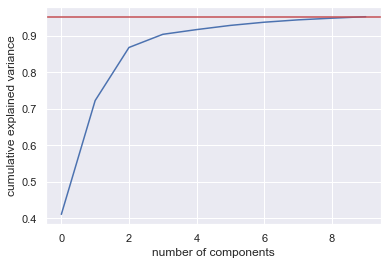

In [98]:
pca = PCA(10).fit(ScaniaNoLabel)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### I'm taking 9 components as I'm getting 95% somewhere on 9th component.

In [99]:
pca = PCA(n_components=9)
projected = pca.fit_transform(ScaniaNoLabel)
projected.shape

(60000, 9)

In [100]:
scania_pca = pd.DataFrame(projected, columns=['C1', 'C2','C3','C4','C5','C6','C7','C8','C9'])
scania_pca

,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,0.35,0.79,0.07,-0.05,0.01,-0.05,-0.03,0.04,-0.04
1,0.15,-0.18,-0.12,0.68,0.02,0.05,-0.01,0.02,-0.03
2,-0.22,-0.14,-0.01,-0.01,0.00,-0.02,0.00,-0.02,0.02
3,-0.48,-0.11,-0.03,-0.01,0.00,0.01,-0.00,0.00,-0.00
4,0.27,-0.20,-0.05,-0.02,-0.01,-0.02,-0.01,0.03,-0.05
...,...,...,...,...,...,...,...,...,...
59995,0.85,-0.27,-0.01,-0.01,0.02,-0.06,-0.03,-0.00,-0.04
59996,-0.21,0.87,-0.01,-0.01,-0.00,0.02,0.00,-0.00,0.00
59997,-0.33,0.88,0.01,-0.01,-0.00,0.01,0.00,0.00,-0.00
59998,-0.26,0.86,0.20,-0.03,0.02,-0.07,-0.04,0.02,0.02


In [101]:
scania_pca['class'] = df['class']
scania_pca

,C1,C2,C3,C4,C5,C6,C7,C8,C9,class
0,0.35,0.79,0.07,-0.05,0.01,-0.05,-0.03,0.04,-0.04,0
1,0.15,-0.18,-0.12,0.68,0.02,0.05,-0.01,0.02,-0.03,0
2,-0.22,-0.14,-0.01,-0.01,0.00,-0.02,0.00,-0.02,0.02,0
3,-0.48,-0.11,-0.03,-0.01,0.00,0.01,-0.00,0.00,-0.00,0
4,0.27,-0.20,-0.05,-0.02,-0.01,-0.02,-0.01,0.03,-0.05,0
...,...,...,...,...,...,...,...,...,...,...
59995,0.85,-0.27,-0.01,-0.01,0.02,-0.06,-0.03,-0.00,-0.04,0
59996,-0.21,0.87,-0.01,-0.01,-0.00,0.02,0.00,-0.00,0.00,0
59997,-0.33,0.88,0.01,-0.01,-0.00,0.01,0.00,0.00,-0.00,0
59998,-0.26,0.86,0.20,-0.03,0.02,-0.07,-0.04,0.02,0.02,0


# 

# Statistics

### Descriptive Statistical Analysis
Creating positive and negative classes first

In [102]:
positive_df = df.groupby('class').get_group(1)

In [103]:
positive_df.tail()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59484,1,895178,356014263.03,190620.64,6.82,11.01,0.00,0.00,0.00,0.00,...,9116224.00,4276644.00,8701496.00,8082264.00,5827284.00,2057354.00,1662302.00,10790.00,0.09,0.21
59601,1,862134,356014263.03,190620.64,6.82,11.01,0.00,38834.00,1227952.00,8877294.00,...,3456564.00,1793170.00,4159190.00,5847384.00,8364506.00,12875424.00,661442.00,2458.00,0.09,0.21
59692,1,186856,356014263.03,190620.64,0.00,0.00,0.00,0.00,4300.00,910488.00,...,2713108.00,800182.00,322322.00,71638.00,34662.00,7304.00,2538.00,0.00,0.00,0.00
59742,1,605092,356014263.03,190620.64,6.82,11.01,0.00,44320.00,1048970.00,7820828.00,...,3940400.00,1865730.00,3698692.00,3271958.00,9831898.00,3755392.00,65610.00,0.00,0.09,0.21
59769,1,331704,1484.00,1142.00,0.00,0.00,0.00,267100.00,1384372.00,6484382.00,...,3738648.00,1425312.00,3381954.00,4346910.00,2166330.00,296580.00,15434.00,0.00,0.00,0.00


In [104]:
negative_df = df.groupby('class').get_group(0)

In [105]:
negative_df.tail()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,0,153002,664.00,186.00,0.00,0.00,0.00,0.00,0.00,2564.00,...,998500.00,566884.00,1290398.00,1218244.00,1019768.00,717762.00,898642.00,28588.00,0.00,0.00
59996,0,2286,2130706538.00,224.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10578.00,6760.00,21126.00,68424.00,136.00,0.00,0.00,0.00,0.00,0.00
59997,0,112,2130706432.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,...,792.00,386.00,452.00,144.00,146.00,2622.00,0.00,0.00,0.00,0.00
59998,0,80292,2130706432.00,494.00,0.00,0.00,0.00,0.00,0.00,0.00,...,699352.00,222654.00,347378.00,225724.00,194440.00,165070.00,802280.00,388422.00,0.00,0.00
59999,0,40222,698.00,628.00,0.00,0.00,0.00,0.00,0.00,0.00,...,440066.00,183200.00,344546.00,254068.00,225148.00,158304.00,170384.00,158.00,0.00,0.00


### Positive class - central tendencies
I will base all my descriptive stats on column "aa_000" as dataset is anonymised.

In [106]:
pos_mean = positive_df['aa_000'].mean()
pos_mean

659173.664

In [107]:
pos_median = positive_df['aa_000'].median()
pos_median

584994.0

In [108]:
pos_mode = positive_df['aa_000'].mode()
pos_mode

0    181460
dtype: int64

### Negative class - central tendencies

In [109]:
neg_mean = negative_df['aa_000'].mean()
neg_mean

49169.767966101695

In [110]:
neg_median = negative_df['aa_000'].median()
neg_median

30416.0

In [111]:
neg_mode = negative_df['aa_000'].mode()
neg_mode

0    8
dtype: int64

### Variance and standard deviation

In [112]:
pos_variance = positive_df['aa_000'].var()
pos_variance

188689353871.02255

In [113]:
pos_std_dev = positive_df['aa_000'].std()
pos_std_dev

434383.8784658364

In [114]:
neg_variance = negative_df['aa_000'].var()
neg_variance

12111548650.965311

In [115]:
neg_std_dev = negative_df['aa_000'].std()
neg_std_dev

110052.48134851531

### Interpretation of the results
From the outcome of the variance and standard deviation, we can see that positive class dataset has way higher variance and standard deviation than negative class dataset, even though negative class dataset has a lot more inputs (59000 rows) than positive one (1000 rows). Since data is anonymised, I can't interpretate meaning of values but, from this difference in variance and standard deviation between negative and positive class, I can say that positive class dataset is more spread out, has greater variability and wider range of values.    

# 

### Distribution of APS component failures in the positive class - visualisation
Due to high number of columns in positive class dataset, I will use "class" and aa_000" columns.
Also, due to high number of values in "aa_000" column, I will use lowest 10 values while doing visualisation as visualisation would be unrepresentative other way.

[Text(0.5, 0, '10 lowest values from aa_000'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram of 10 lowest values of aa_000 by class')]

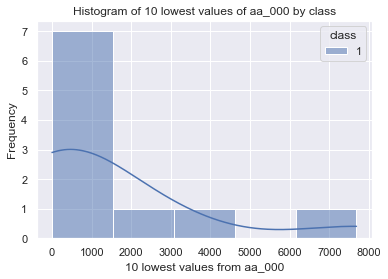

In [118]:
lowest_values = positive_df.nsmallest(10, 'aa_000')
ax = sns.histplot(lowest_values, x='aa_000', hue='class', kde=True)
ax.set(xlabel='10 lowest values from aa_000', ylabel='Frequency', title='Histogram of 10 lowest values of aa_000 by class')

Text(0.5, 1.0, 'Box plot of top 10 lowest values of aa_000')

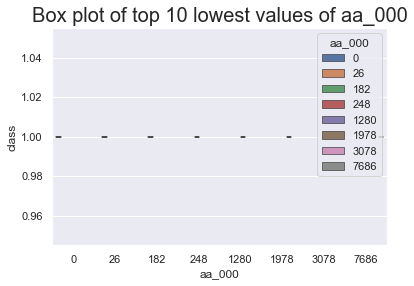

In [120]:
lowest_values = positive_df.nsmallest(10, 'aa_000')
sns.boxplot(x='aa_000', y='class', data=lowest_values, hue='aa_000')
plt.title('Box plot of top 10 lowest values of aa_000', fontsize=20)

## Binomial and Poisson Distribution

### Task 1 - Binomial Distribution
Suppose that the company performs 50 truck inspections per week. What is the 
probability of observing at least 10 APS component failures in a given period? 
 

# 

In order to get probability of at least 10 APS component failures within the week, I need to get probability (p) of getting failure first. I can get that by dividing number of positive instances with total number of positive and negative instances.

In [127]:
fail_prob = len(positive_df) / (len(positive_df) + len(negative_df))
print (fail_prob)

0.016666666666666666


Now, after I got failure probability, I need to get failure probability on week basis. To get that, I should just multiply failure probability by 7 (number of days in week).

In [129]:
week_fail_prob = fail_prob * 7
print(week_fail_prob)

0.11666666666666667


Now, when I have all the parts of formula, I can calculate probability of observing at least 10 APS component failures in a week by using Binomial Distribution. My n=50, I got p above and I need survival function (SF) as I need value that is greater than some other value (in this case, greater than 9).

In [130]:
binom.sf(k = 9, n=50, p = week_fail_prob)

0.06065195231769028

### Probability of at least 10 APS component failures within the week out of 50 truck inspections is 6.06%

# 

### Task 2 - Poisson Distribution
Using the average of APS component failures in one of the variables, calculate 
the probability of observing 8 or more APS component failures in a given 
period? 

Since we have enough information from the task above, we will use that information to get mu, which we need for Poisson distribution.
We can use the binomial distribution formula to calculate the average number of APS component failures per week.
The binomial distribution formula is:
μ = n * p  where μ is the mean or expected value of the distribution, n is the number of trials, and p is the probability of success in each trial.
In this case, we have n = 50 and p = 0.11666666666666667.

In [132]:
n = 50
p = 0.11666666666666667
avg_no_fail = n * p
print(avg_no_fail)

5.833333333333333


In [133]:
poisson.sf(k = 7, mu = 5.83)

0.23296536612363222

### Probability of 8 or more APS component failures within the week out of 50 truck inspections is 23.29%

# 

## Normal Distribution

### Task: Use normal distribution to identify two insightful probabilities to this analysis.

My first task will be to check what is the probability of getting less than 5 failures within the week.

My second task will be to find probability of getting 10 or more failures within the week if we start inspecting 80 trucks in a week.

### Task 1
First, I will use already known information (average number of APS component failures per week) so I can get standard deviation of it.

In [138]:
variance = n * p * (1 - p)

std_dev = math.sqrt(variance)

print("Standard deviation of APS component failures per week:", std_dev)

Standard deviation of APS component failures per week: 2.2699730786460393


Then, I will standardize the data:

In [140]:
μ = 5.83
σ = 2.70
X = 5

#Formula for standardization: 
Z = (X-μ)/σ

print(Z)

-0.3074074074074074


### After using "Probability Distributions" calculator, I got probability of 37.94% of getting less than 5 failures within the week.

# 

### Task 2
I will use again previously used Binomial Distributions. 

After that, will get average of failures within the week.

Third, I will calculate new standard deviation.

And then, as a last thing, I will standardize the data and get the probability of getting 10 or more failures within the week if we start inspecting 80 trucks in a week.

In [143]:
binom.sf(k = 10, n=80, p = week_fail_prob)

0.32880954786455224

In [144]:
n = 80
p = 0.11666666666666667
avg_no_fail = n * p
print(avg_no_fail)

9.333333333333334


In [146]:
variance = n * p * (1 - p)

std_dev = math.sqrt(variance)

print("Standard deviation of APS component failures per week:", std_dev)

Standard deviation of APS component failures per week: 2.8713140623144042


In [147]:
μ = 9.33
σ = 2.87
X = 10

#Formula for standardization: 
Z = (X-μ)/σ

print(Z)

0.23344947735191635


### After using "Probability Distributions" calculator, I got probability of 40.77%% of getting more than 10 failures within the week if we start inspecting 80 trucks